In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/zxcqwe.csv", sep=";")
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground,residential_complex
0,VESPER,developer,https://www.cian.ru/sale/flat/286258299/,Москва,sale,flat,5,9,2,104.2,150958800,Тверской,1-я Тверская-Ямская,2,Маяковская,Vesper Tverskaya
1,ZIP Realty,real_estate_agent,https://www.cian.ru/sale/flat/308802493/,Москва,sale,flat,10,20,3,110.7,122000000,Пресненский,Костикова,4к1,Улица 1905 года,Lucky
2,ID 18174647,realtor,https://www.cian.ru/sale/flat/301450189/,Москва,sale,flat,26,31,5,246.7,286355351,Очаково-Матвеевское,Нежинская,1к1,Давыдково,Кутузовская Ривьера
3,VESPER,developer,https://www.cian.ru/sale/flat/308762624/,Москва,sale,flat,5,21,2,110.6,108976392,Пресненский,Костикова,4к1,Улица 1905 года,Lucky
4,SHOW ME,real_estate_agent,https://www.cian.ru/sale/flat/297733877/,Москва,sale,flat,80,85,4,294.6,412440000,Пресненский,Московский международный деловой центр Москва-...,NaN,Деловой центр,NaN


In [2]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24731 entries, 0 to 24730
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   author               24041 non-null  object
 1   author_type          24074 non-null  object
 2   url                  24729 non-null  object
 3   location             24729 non-null  object
 4   deal_type            24729 non-null  object
 5   accommodation_type   24729 non-null  object
 6   floor                24729 non-null  object
 7   floors_count         24728 non-null  object
 8   rooms_count          24728 non-null  object
 9   total_meters         24627 non-null  object
 10  price                24515 non-null  object
 11  district             10089 non-null  object
 12  street               21126 non-null  object
 13  house_number         22254 non-null  object
 14  underground          21780 non-null  object
 15  residential_complex  13835 non-null  object
dtypes: o

In [3]:
df.drop_duplicates(inplace=True)
df.drop(['author'], axis=1,inplace=True)

print(f"стало {df.shape[1]} колонок и {df.shape[0]} строк")


стало 15 колонок и 18687 строк


# Удаление NAN

<Axes: >

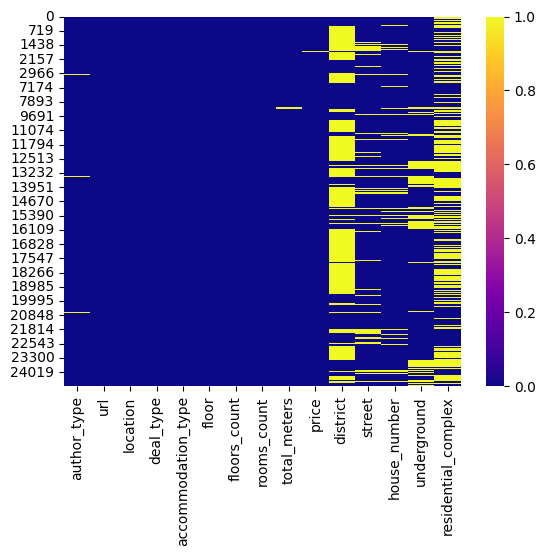

In [4]:
sns.heatmap(df.isnull(), cmap = "plasma") #отображает нулевые значения

In [5]:
print(df["district"].isnull().sum(),"-nulls in district")
print(df["underground"].isnull().sum(),"-nulls in underground")
print(df["residential_complex"].isnull().sum(),"-nulls in residential_complex")
print(df["street"].isnull().sum(),"-nulls in street")

10926 -nulls in district
2820 -nulls in underground
8486 -nulls in residential_complex
2615 -nulls in street


**`че с этим делать вообще я вшоке плакичи(`**

In [6]:
df['district'].fillna(df['location'], inplace=True)
df['underground'].fillna(df['district'], inplace=True)
df['residential_complex'].fillna(df['underground'], inplace=True)


df.drop(['house_number'], axis=1,inplace=True)
df = df.dropna()





<ipython-input-6-b26e39b6b9f3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['district'].fillna(df['location'], inplace=True)
<ipython-input-6-b26e39b6b9f3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

район пуст почти во всех подмосковных строках. Ставим район=локация, и так по уменьшению для всего датафрейма. Остальное незначительно и удаляем НА...

<Axes: >

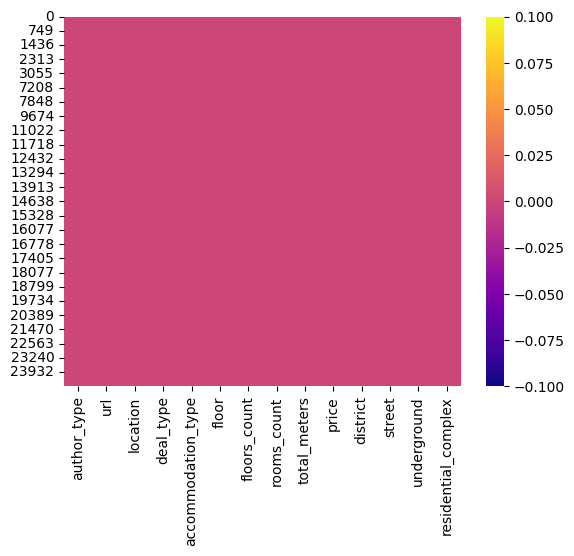

In [7]:
sns.heatmap(df.isnull(), cmap = "plasma")

ПОБЕДААА!!!!

# Приведение типов

In [8]:
df['floor'] = pd.to_numeric(df['floor'], errors='coerce')
df['floors_count'] = pd.to_numeric(df['floors_count'], errors='coerce')
df['total_meters'] = pd.to_numeric(df['total_meters'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['rooms_count'] = pd.to_numeric(df['rooms_count'], errors='coerce')


Перевод данных которые должны быть численными


In [9]:
df['price_for_metr'] = round((df['price'] / df['total_meters']), 3)
df["price_for_metr"]

,price_for_metr
0,1448740.883
1,1102077.687
2,1160743.214
3,985320.000
4,1400000.000
...,...
24723,368598.307
24725,273092.369
24726,157909.988
24728,885106.383


## Поиск выбросов

Цена за метр квадратный

In [10]:
print(df.loc[df['price_for_metr'].idxmax()])
print(df.loc[df['floors_count'].idxmax()])
print(df.loc[df['rooms_count'].idxmax()])

author_type                                   real_estate_agent
url                    https://www.cian.ru/sale/flat/307000211/
location                                                 Троицк
deal_type                                                  sale
accommodation_type                                         flat
floor                                                       2.0
floors_count                                                7.0
rooms_count                                                 3.0
total_meters                                              137.1
price                                               650000000.0
district                                            Пресненский
street                                           Малая Бронная 
underground                                          Пушкинская
residential_complex                            Малая Бронная 15
price_for_metr                                      4741064.916
Name: 9593, dtype: object
author_type   

Поискал выбросы, нашел квартирку с 860к комнат

In [11]:
df.drop(([df['rooms_count'].idxmax()]), axis = 0, inplace=True)
print(df.loc[df['rooms_count'].idxmax()])

author_type                                   real_estate_agent
url                    https://www.cian.ru/sale/flat/307708792/
location                                                 Троицк
deal_type                                                  sale
accommodation_type                                         flat
floor                                                       3.0
floors_count                                                NaN
rooms_count                                               784.3
total_meters                                       1000000000.0
price                                                       NaN
district                                               Минская 
street                                                     1Гк7
underground                                            Минская 
residential_complex                                    Минская 
price_for_metr                                              NaN
Name: 11288, dtype: object


нашлось очень много строк сломанных строк

In [12]:
print(f"было {df.shape[0]} строк")
df.drop(df[df['rooms_count'] > 10].index, inplace=True)
print(f"стало {df.shape[0]} строк")
print(df.loc[df['rooms_count'].idxmax()])

было 15828 строк
стало 15753 строк
author_type                                             realtor
url                    https://www.cian.ru/sale/flat/301450189/
location                                                 Москва
deal_type                                                  sale
accommodation_type                                         flat
floor                                                      26.0
floors_count                                               31.0
rooms_count                                                 5.0
total_meters                                              246.7
price                                               286355351.0
district                                    Очаково-Матвеевское
street                                               Нежинская 
underground                                           Давыдково
residential_complex                         Кутузовская Ривьера
price_for_metr                                      1160743.214
Name:

Выбросы устранены!!!!!

#  Немного Анализа

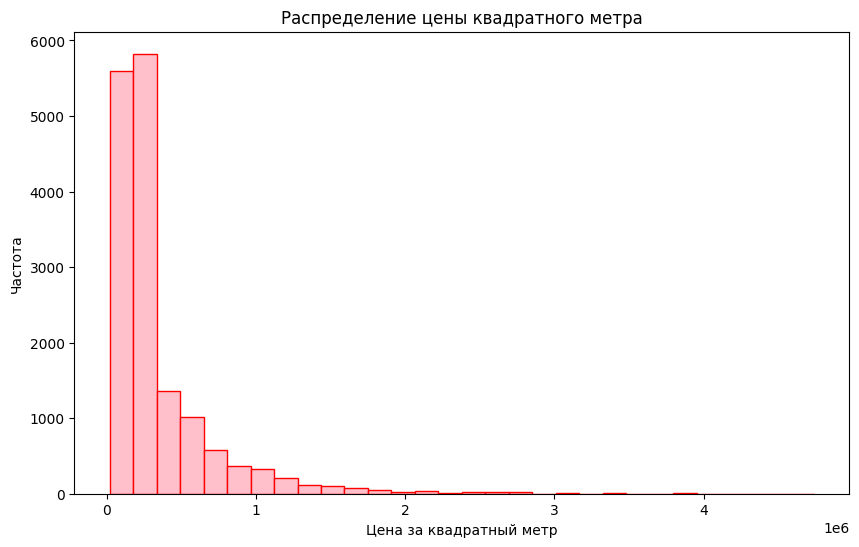

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['price_for_metr'], bins=30, color='pink', edgecolor='red')
plt.title('Распределение цены квадратного метра')
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Частота')
plt.show()


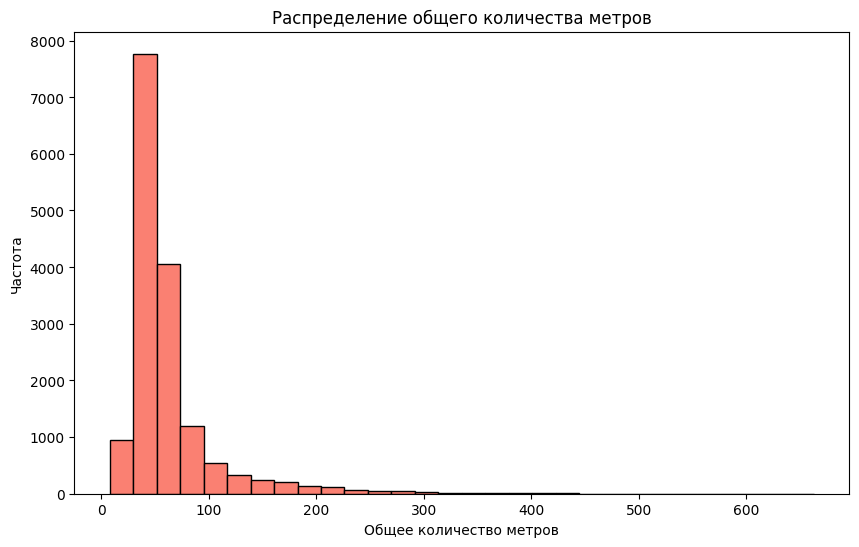

In [14]:
# Пример для признака 'total_sqm' (общее количество метров)
plt.figure(figsize=(10, 6))
plt.hist(df['total_meters'], bins=30, color='salmon', edgecolor='black')
plt.title('Распределение общего количества метров')
plt.xlabel('Общее количество метров')
plt.ylabel('Частота')
plt.show()

самые частые 50-70 метров. реалистично

In [15]:
print(df.loc[df['total_meters'].idxmax()])

author_type                                   real_estate_agent
url                    https://www.cian.ru/sale/flat/301640466/
location                                                 Москва
deal_type                                                  sale
accommodation_type                                         flat
floor                                                      45.0
floors_count                                               57.0
rooms_count                                                 5.0
total_meters                                              663.0
price                                               218000000.0
district                                            Хорошевский
street                                      Чапаевский переулок
underground                                            Аэропорт
residential_complex                                Триумф-Палас
price_for_metr                                       328808.446
Name: 8112, dtype: object


реально 660м. квартира(прверено)

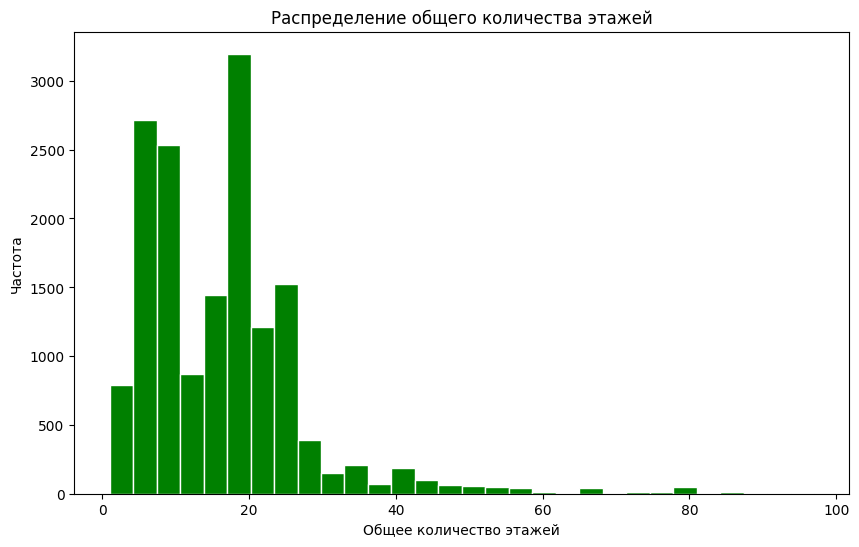

In [16]:

plt.figure(figsize=(10, 6))
plt.hist(df['floors_count'], bins=30, color='green', edgecolor='white')
plt.title('Распределение общего количества этажей')
plt.xlabel('Общее количество этажей')
plt.ylabel('Частота')
plt.show()

чаще всего встречаются 15-20 этажные здания. График выглядит реалистично. 90+этажное здание реально есть(проверено)

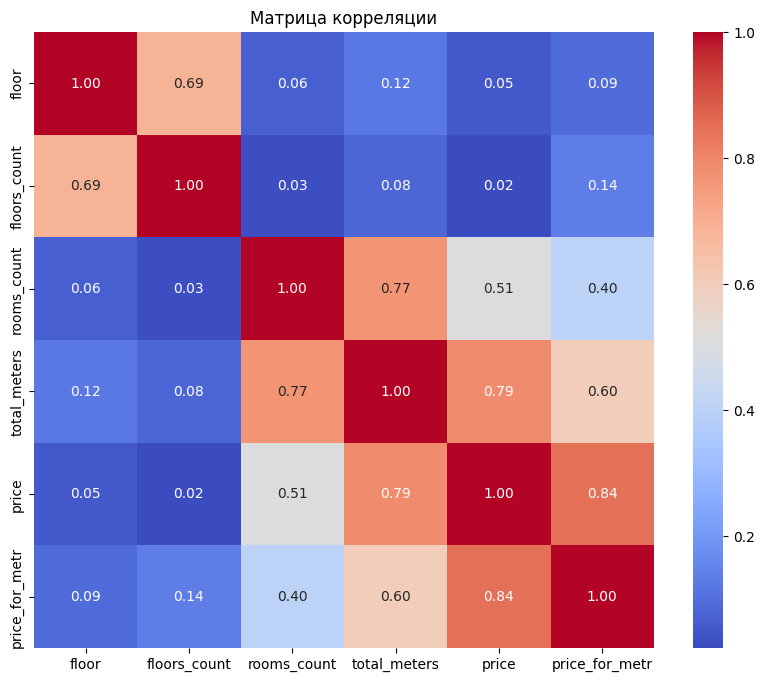

In [17]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Создаем матрицу корреляции
corr_matrix = df[numeric_cols].corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

на целевую переменную сильно влияют цена и площадь квартиры, чуть меньше влияет количество комнат. На цену влияют площадь и колво комнат. этаж коррелируют количество этажей. Площадь коррелирует с колвом комнат и ценой.



#Преобразование категориальных данных в числа

In [18]:
df.drop(['url'], axis=1,inplace=True) # точно не влияет
df.drop(['deal_type'], axis=1,inplace=True) # везде одинаковое

In [20]:
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df[categorical_columns])
df[categorical_columns] = encoded_data.astype(int)


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15753 entries, 0 to 24729
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author_type          15753 non-null  int64  
 1   location             15753 non-null  int64  
 2   accommodation_type   15753 non-null  int64  
 3   floor                15752 non-null  float64
 4   floors_count         15752 non-null  float64
 5   rooms_count          15752 non-null  float64
 6   total_meters         15751 non-null  float64
 7   price                15752 non-null  float64
 8   district             15753 non-null  int64  
 9   street               15753 non-null  int64  
 10  underground          15753 non-null  int64  
 11  residential_complex  15753 non-null  int64  
 12  price_for_metr       15751 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 2.2 MB


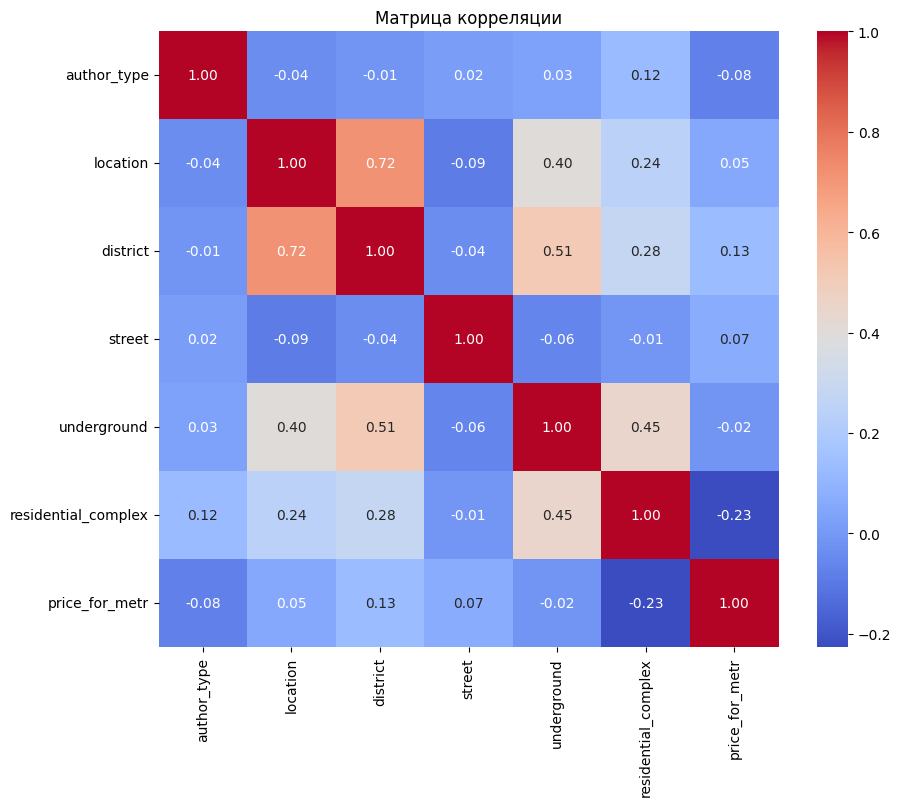

In [21]:
numeric_cols = ["author_type",'location','district',"street","underground","residential_complex","price_for_metr"]

# Создаем матрицу корреляции
corr_matrix = df[numeric_cols].corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

на целевую переменную расположение коррелирует очень слабо

